# Домашняя работа №2
### Стержанова Виталия БЭК213

In [8]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## Задача №3

Иноагент Иннокентий по 20 наблюдениям строит 95%-й доверительный интервал для математического ожидания несколькими способами: классический асимптотический нормальный интервал, с помощью наивного бутстрэпа, с помощью бутстрэпа t-статистики.

а) [15] Для каждого способа с помощью 10000 симуляций оцените вероятность того, что номинально 95%-й доверительный интервал фактически накрывает математическое ожидание, если наблюдения распределены экспоненциально с интенсивностью 1.

Для начала решим задачу с помощью классического асимптотического нормального интервала:

In [48]:
np.random.seed(42)  # Задаем начальное состояние генератора случайных чисел для воспроизводимости результатов

# По условию:
n = 20
true_mean = 1
num_simulations = 10000
contains_mean = 0
intensity = 1

for _ in range(num_simulations):
    sample = np.random.exponential(scale=1, size=n)
    
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Используем несмещенную оценку стандартного отклонения
    
    # Вычисление границ доверительного интервала
    z_critical = 1.96  # 95%-й Z-квантиль для двустороннего доверительного интервала
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    # Проверим, содержит ли доверительный интервал истинное математическое ожидание
    if confidence_interval[0] <= true_mean <= confidence_interval[1]:
        contains_mean += 1

# Вычислим вероятности накрытия истинного математического ожидания
coverage_probability = contains_mean / num_simulations

print("Вероятность накрытия истинного математического ожидания:", coverage_probability)

Вероятность накрытия истинного математического ожидания: 0.9036


Далее используем наивный бутстрэп:

In [65]:
def bootstrap_mean(data):
    resamples = np.random.choice(data, size=len(data), replace=True)
    return np.mean(resamples)

confidence_interval = 0.95

# Генерируем выборки и строим наивный бутстрэп-интервалы
intervals = []
for _ in range(num_simulations):
    observations = np.random.exponential(scale=1, size=n)
    bootstrap_sample_means = [bootstrap_mean(observations) for _ in range(n)]
    sorted_means = np.sort(bootstrap_sample_means)
    lower_index = int((1 - confidence_interval) / 2 * n)
    upper_index = int((1 + confidence_interval) / 2 * n)
    interval = (sorted_means[lower_index], sorted_means[upper_index])
    intervals.append(interval)

# Оцениваем вероятность покрытия математического ожидания
true_mean = 1  
coverage_probability = np.mean([lower <= true_mean <= upper for lower, upper in intervals])
print(f"Вероятность покрытия математического ожидания: {coverage_probability}")

Вероятность покрытия математического ожидания: 0.8646


Наконец, реализуем с помощью бутстрэпа t-статистики. 

In [90]:
np.random.seed(42)  # Задаем начальное состояние генератора случайных чисел для воспроизводимости результатов

# По условию:
n = 20
true_mean = 1
num_simulations = 10000
intensity = 1
alpha = 0.05

sample = sts.expon.rvs(scale=1/intensity, size=(num_simulations, n), random_state=42)
contains_mean = 0

for i in sample:
    bootstrap_sample = np.random.choice(i, size=(num_simulations, n))                                                              
    R = (np.mean(bootstrap_sample, axis=1) - np.mean(i))/(np.std(bootstrap_sample, ddof=1, axis=1)/np.sqrt(n))           
    Left = np.quantile(R, alpha/2)
    Right = np.quantile(R, 1 - alpha/2)
    interval = [np.mean(i) - Right * (np.std(i, ddof=1)/np.sqrt(n)), np.mean(i) - Left * (np.std(i, ddof=1)/np.sqrt(n))] 
    
    # Проверим, содержит ли доверительный интервал истинное математическое ожидание
    if interval[0] < 1/intensity and interval[1] > 1/intensity:
        contains_mean += 1

# Вычислим вероятности накрытия истинного математического ожидания
coverage_probability = contains_mean/num_simulations
print(f'Вероятность, что 95%-ый доверительный интервал фактически накрывает математическое ожидание: {coverage_probability}')

Вероятность, что 95%-ый доверительный интервал фактически накрывает математическое ожидание: 0.9467


б) [5] Пересчитайте вероятности накрытия, если наблюдения имеют распределение Стьюдента с тремя степенями свободы.

Для начала решим задачу с помощью классического асимптотического нормального интервала:

In [97]:
np.random.seed(42)  # Задаем начальное состояние генератора случайных чисел для воспроизводимости результатов

# По условию:
n = 20
true_mean_t = 0
num_simulations = 10000
contains_mean = 0
intensity = 1
k = 3

for _ in range(num_simulations):
    sample = sts.t.rvs(k, size=n)
    
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)  # Используем несмещенную оценку стандартного отклонения
    
    # Вычисление границ доверительного интервала
    z_critical = 1.96  # 95%-й Z-квантиль для двустороннего доверительного интервала
    margin_of_error = z_critical * (sample_std / np.sqrt(n))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    # Проверим, содержит ли доверительный интервал истинное математическое ожидание
    if confidence_interval[0] <= true_mean_t <= confidence_interval[1]:
        contains_mean += 1

# Вычислим вероятности накрытия истинного математического ожидания
coverage_probability = contains_mean / num_simulations

print("Вероятность накрытия истинного математического ожидания:", coverage_probability)

Вероятность накрытия истинного математического ожидания: 0.9438


Далее используем наивный бутстрэп:

In [99]:
def bootstrap_mean(data):
    resamples = np.random.choice(data, size=len(data), replace=True)
    return np.mean(resamples)

confidence_interval = 0.95
k = 3

# Генерируем выборки и строим наивный бутстрэп-интервалы
intervals = []
for _ in range(num_simulations):
    observations = sts.t.rvs(k, size=n)
    bootstrap_sample_means = [bootstrap_mean(observations) for _ in range(n)]
    sorted_means = np.sort(bootstrap_sample_means)
    lower_index = int((1 - confidence_interval) / 2 * n)
    upper_index = int((1 + confidence_interval) / 2 * n)
    interval = (sorted_means[lower_index], sorted_means[upper_index])
    intervals.append(interval)

# Оцениваем вероятность покрытия математического ожидания
true_mean_t = 0
coverage_probability = np.mean([lower <= true_mean_t <= upper for lower, upper in intervals])
print(f"Вероятность покрытия математического ожидания: {coverage_probability}")

Вероятность покрытия математического ожидания: 0.8758


Наконец, реализуем с помощью бутстрэпа t-статистики.

In [101]:
np.random.seed(42)  # Задаем начальное состояние генератора случайных чисел для воспроизводимости результатов

# По условию:
n = 20
true_mean_t = 0
num_simulations = 10000
intensity = 1
alpha = 0.05

sample = sts.t.rvs(3, size=(num_simulations, n))
contains_mean = 0

for i in sample:
    bootstrap_sample = np.random.choice(i, size=(num_simulations, n))                                                              
    R = (np.mean(bootstrap_sample, axis=1) - np.mean(i))/(np.std(bootstrap_sample, ddof=1, axis=1)/np.sqrt(n))           
    Left = np.quantile(R, alpha/2)
    Right = np.quantile(R, 1 - alpha/2)
    interval = [np.mean(i) - Right * (np.std(i, ddof=1)/np.sqrt(n)), np.mean(i) - Left * (np.std(i, ddof=1)/np.sqrt(n))] 
    
    # Проверим, содержит ли доверительный интервал истинное математическое ожидание
    if interval[0] < true_mean_t and interval[1] > true_mean_t:
        contains_mean += 1

# Вычислим вероятности накрытия истинного математического ожидания
coverage_probability = contains_mean/num_simulations
print(f'Вероятность, что 95%-ый доверительный интервал фактически накрывает математическое ожидание: {coverage_probability}')

Вероятность, что 95%-ый доверительный интервал фактически накрывает математическое ожидание: 0.9243


в) [5] Какой способ оказался лучше?

В случае работы с экспоненциальным распределением наилучшие результаты получились __с помощью бутстрэпа t-статистики (вероятность 0.9467)__. Во втором случае, когда мы работаем с распределение Стьюдента с тремя степенями свободы лучший результат показал метод __классического асимптотического нормального интервала (вероятность 0.9438)__.

## Задача №4

Проверьте гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернативной гипотезы возьмите гипотезу о неравенстве.

$$H_0: \mu_c = \mu_v$$

$$H_1: \mu_c \not = \mu_v$$

In [115]:
from scipy import stats

Импортируем результаты экзамена по теории вероятностей этого года по 30-балльной шкале.

In [112]:
df = pd.read_csv('exam.csv')
df.head(10)

,num,Last name,Name,Mail,info_1,info_2,info_3,bpip,prepod,Вариант,...,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,NaN,NaN,Желтый,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Голубой,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0
2,NaN,NaN,Зеленый,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,21.0
3,NaN,NaN,Оранжевый,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,33.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,14.0,40.0
5,1,Репенкова,Полина Александровна,parepenkova@edu.hse.ru,351118027,3668903494,NaN,ип,Демешев,4.0,...,NaN,16.0,NaN,16,4,NaN,NaN,5.0,17.0,61.0
6,2,Ролдугина,Софья Александровна,saroldugina@edu.hse.ru,351118027,1705654528,NaN,ип,Демешев,NaN,...,NaN,0.0,NaN,неявка,неявка,NaN,NaN,6.0,20.0,45.0
7,3,Сафина,Алия Линаровна,alsafina@edu.hse.ru,351118027,5096071996,NaN,ип,Демешев,3.0,...,NaN,19.0,NaN,19,5,NaN,NaN,7.0,23.0,38.0
8,4,Сидоров,Иван Максимович,imsidorov@edu.hse.ru,351118027,4361493219,NaN,ип,Демешев,4.0,...,NaN,26.0,NaN,26,8,NaN,NaN,8.0,25.0,24.0
9,5,Солоухин,Иван Владимирович,ivsoloukhin@edu.hse.ru,351118027,1705636488,NaN,ип,Демешев,4.0,...,NaN,21.0,NaN,21,6,NaN,NaN,9.0,27.0,16.0


Удалим первые 5 строк, а также оставим только столбцы с фамилиями (Last name) и итоговым баллом по 30-балльной шкале (Unnamed: 72)

In [113]:
df = df[['Last name', 'Unnamed: 72']][5:]
df = df.reset_index(drop=True).rename(columns={'Unnamed: 72':'Score'})
df

,Last name,Score
0,Репенкова,16.0
1,Ролдугина,0.0
2,Сафина,19.0
3,Сидоров,26.0
4,Солоухин,21.0
...,...,...
327,Сенников,19.0
328,Ся,0.0
329,Сятова,0.0
330,Темиркулов,0.0


а) [5] Используйте тест Уэлча. В каждом случае укажите P-значение и статистический вывод для уровня значимости 5%

In [135]:
# Создадим две группы по первой буквы фамилии
v = df[df['Last name'].str[0].str.lower().isin(['а', 'о', 'у', 'ы', 'э', 'е', 'ё', 'и', 'ю', 'я'])].reset_index(drop=True)
c = df[~df['Last name'].str[0].str.lower().isin(['а', 'о', 'у', 'ы', 'э', 'е', 'ё', 'и', 'ю', 'я'])].reset_index(drop=True)

# Проведем тест Уэлча
t_stat, p_value = stats.ttest_ind(v['Score'], c['Score'], equal_var=False)

print("p-value:", p_value)
alpha = 0.05

# Проверка статистического вывода
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

p-value: 0.3974027153843839
Нет оснований отвергать нулевую гипотезу


Не отвергаем нулевую гипотезу: результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

б) [5] Используйте наивный бутстрэп. В каждом случае укажите P-значение и статистический вывод для уровня значимости 5%

In [172]:
np.random.seed(42)

num_simulations = 10000
n_v = len(v)
n_c = len(c)

# Создадим переменную для хранения результата
result = np.zeros(num_simulations)

for i in range(num_simulations):
    # Сгенерируем бутстрэп-выборки для v и с
    v_bootstrap = np.random.choice(v['Score'], size=n_c)
    c_bootstrap = np.random.choice(c['Score'], size=n_v)
    
    # Посчитаем разницу мат ожиданий на соотвествующих выборках и добавим результат в отдельную переменную для дальнейшей работы
    bootstrap_diff_means = np.mean(v_bootstrap) - np.mean(c_bootstrap)
    result[i] = bootstrap_diff_means

# Вычислим p-value через вероятности получить разницу средних больше 0 или меньше 0 (так как у нас двусторонний тест, берем наименьшее)
p_value = 2 * min(np.sum((np.array(result) > 0))/ num_simulations, np.sum((np.array(result) <= 0))/num_simulations)
alpha = 0.05

print("p-value:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

p-value: 0.3786
Нет оснований отвергать нулевую гипотезу


Не отвергаем нулевую гипотезу: результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

в) [5] Используйте бутстрэп t-статистики. В каждом случае укажите P-значение и статистический вывод для уровня значимости 5%

In [218]:
np.random.seed(42)

num_simulations = 10000
n_v = len(v)
n_c = len(c)

# Создадим переменную для хранения результата
t_stats = np.zeros(num_simulations)

for i in range(num_simulations):
    # Сгенерируем бутстрэп-выборки для v и с
    c_bootstrap = np.random.choice(c['Score'], size=n_c)
    v_bootstrap = np.random.choice(v['Score'], size=n_v)
    
    # Посчитаем t статистику на соотвествующих выборках и добавим результат в отдельную переменную для дальнейшей работы
    t_stat = (c_bootstrap.mean() - v_bootstrap.mean() - (c['Score'].mean() - v['Score'].mean()))/(np.sqrt(c_bootstrap.var(ddof = 1)/ n_c + v_bootstrap.var(ddof = 1)/ n_v))
    t_stats[i] = t_stat

observed_stat =  (np.mean(c['Score']) - np.mean(v['Score'])) / np.sqrt((np.var(v['Score']) / n_c) + (np.var(c['Score']) / n_v))
p_value = 2 * min(np.sum((t_stats > observed_stat))/num_simulations, np.sum((t_stats <= observed_stat))/num_simulations)

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

print("p-value:", p_value)

Нет оснований отвергать нулевую гипотезу
p-value: 0.3852


Не отвергаем нулевую гипотезу: результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

г) [5] Используйте перестановочный тест. В каждом случае укажите P-значение и статистический вывод для уровня значимости 5%

In [220]:
alpha = 0.05

# Вычисляем разность средних значений
observed_diff = np.mean(v['Score']) - np.mean(c['Score'])

# Объединяем данные двух групп
combined_data = np.concatenate((v['Score'], c['Score']))

# Перемешиваем данные случайным образом и разделяем на две группы
perm_diffs = np.zeros(num_simulations)
for i in range(num_simulations):
    np.random.shuffle(combined_data)
    perm_v = combined_data[:n_v]
    perm_c = combined_data[n_v:]
    perm_diffs[i] = np.mean(perm_v) - np.mean(perm_c)

p_value = np.mean(np.abs(perm_diffs) >= np.abs(observed_diff))

print("p-value:", p_value)
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

p-value: 0.3848
Нет оснований отвергать нулевую гипотезу


Не отвергаем нулевую гипотезу: результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны.

## Задача №5

Составьте таблицу сопряжённости, поделив студентов писавших экзамен на четыре группы по двум признакам: набрал ли больше медианы или нет, на согласную или гласную букву начинается фамилия.

In [231]:
df['Group'] = np.where(df['Score'] > df['Score'].median(), 'T', 'F')

contingency_table = pd.crosstab(index=[df['Last name'].str[0].str.lower().map(lambda x: 'V' if x in 'аоуыэеёиюя' else 'C')],
                               columns=df['Group'],
                               rownames=['С какой буквы начинается?'],
                               colnames=['Набрал больше медианы?'])

print(contingency_table)

Набрал больше медианы?       F    T
С какой буквы начинается?          
C                          138  145
V                           28   21


а) [5] Постройте 95% асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»). Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

In [273]:
a = contingency_table.iloc[1,1] #количество студентов, у которых балл больше медианы (T) и фамилия начинается на гласную (V)
b = contingency_table.iloc[1,0] #количество студентов, у которых балл меньше медианы (F) и фамилия начинается на гласную (V)
c = contingency_table.iloc[0,1] #количество студентов, у которых балл больше медианы (T) и фамилия начинается на согласную (C)
d = contingency_table.iloc[0,0] #количество студентов, у которых балл меньше медианы (F) и фамилия начинается на согласную (C)

# Расчет отношения шансов (odds ratio)
odds_ratio = (a * d) / (b * c)

# Расчет стандартной ошибки логарифма отношения шансов (SE)
SE = np.sqrt(1 / a + 1 / b + 1 / c + 1 / d)

# Построение 95% асимптотического интервала
lower = np.exp(np.log(odds_ratio) - 1.96 * SE)
upper = np.exp(np.log(odds_ratio) + 1.96 * SE)

# Проверка гипотезы о равенстве отношения шансов единице
z = (np.log(odds_ratio) - 0) / SE

# Расчет p_value
p_value = 2 * (1 - norm.cdf(abs(z)))

print("95% асимптотический интервал для отношения шансов хорошо написать экзамен: [{:.4f}, {:.4f}]".format(lower, upper))
print("P-значение:", p_value)

95% асимптотический интервал для отношения шансов хорошо написать экзамен: [0.3871, 1.3162]
P-значение: 0.280180274566451


In [274]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Нет оснований отвергать нулевую гипотезу


Итого: нулевая гипотеза не отвергается, то есть отношение шансов равно 1.

б) [5] Постройте 95% асимптотический интервал для отношения вероятностей хорошо написать экзамен. Проверьте гипотезу о том, что отношение вероятностей равно 1 и укажите P-значение.

Используя дельта метод найдем дисперсию величины $ Y(\hat p_v, \hat p_c) = \frac{\hat p_v}{\hat p_c}$, где $\hat p_v$ — вероятность хорошо написать экзамен для «гласных» и где $\hat p_c$ — вероятность хорошо написать экзамен для «согласных»:
$$
Y(\hat p_v, \hat p_c) = \frac{\hat p_v}{\hat p_c}
$$
По формуле:
$$
Y \approx Y(x_0) + Y(x_0)'(x-x_0)
$$

Найдем отношение вероятностей в точке $x_0 = (p_v, p_c)$:
$$
Y(\hat p_v, \hat p_c) \approx \frac{p_v}{p_c} +\frac{1}{p_c}(\hat p_v - p_v) -\frac{p_v}{p_c^2}(\hat p_c - p_c)\\
D(Y)\approx D(\frac{p_v}{p_c} +\frac{1}{p_c}(\hat p_v - p_v) -\frac{p_v}{p_c^2}(\hat p_c - p_c))= D(\frac{\hat p_v}{p_c} -\frac{p_v  \hat p_c}{p_c^2} + \frac{p_v}{p_c}) \\ 
D(Y) \approx \frac{1}{p_c^2}D(\hat p_v) +\frac{p_v^2}{p_c^4}D(\hat p_c)
$$
Так как $ D(\hat p_v) = \frac{p_v(1-p_v)}{n_v}$ и $ D(\hat p_с) = \frac{p_с(1-p_с)}{n_с}$:

$$
D(Y) \approx \frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c} 
$$

Тогда доверительный интервал будет иметь вид:

$$
\frac{\hat p_v}{\hat p_c} - z_{\frac{\alpha}{2}} \sqrt{\frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c} } < \frac{ p_v}{p_c} < \frac{\hat p_v}{\hat p_c} + z_{\frac{\alpha}{2}} \sqrt{\frac{p_v(1-p_v)}{p_c^2n_v}+\frac{p_v^2(1-p_c)}{p_c^3n_c} }
$$


Посчитаем значения и подставим числа:

In [246]:
n_c = contingency_table.iloc[0,0] + contingency_table.iloc[0,1]
n_v = contingency_table.iloc[1,0] + contingency_table.iloc[1,1]
p_c = contingency_table.iloc[0,1] / n_c
p_v = contingency_table.iloc[1,1] / n_v
z_crit = stats.norm().ppf(0.975)
D = (p_v * (1 - p_v)) / (p_c**2 * n_v) + (p_v**2 * (1-p_c))/(p_c**3 * n_c)

In [247]:
interval = (p_v/p_c - z_crit * np.sqrt(D), p_v/p_c + z_crit * np.sqrt(D))
interval

(0.5497946344819109, 1.1231117694589758)

Проверим гипотезу о том, что оношение вероятностей равно 1:

$$H_0: \frac{p_v}{p_c} = 1$$

$$H_1: \frac{p_v}{p_c}\not = 1$$

In [262]:
z_obs = (p_v/p_c - 1)/np.sqrt(D)
p_value = sts.norm.cdf(z_obs, loc=0, scale=1) * 2
p_value

0.26347529277764214

In [263]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Нет оснований отвергать нулевую гипотезу


Итого: нулевая гипотеза не отвергается, то есть отношение вероятностей равно 1.

в) [5] Постройте 95% интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа. Проверьте гипотезу о том, что отношение шансов равно 1 и укажите P-значение.

In [306]:
np.random.seed(41)

a = contingency_table.iloc[1,1] #количество студентов, у которых балл больше медианы (T) и фамилия начинается на гласную (V)
b = contingency_table.iloc[1,0] #количество студентов, у которых балл меньше медианы (F) и фамилия начинается на гласную (V)
c = contingency_table.iloc[0,1] #количество студентов, у которых балл больше медианы (T) и фамилия начинается на согласную (C)
d = contingency_table.iloc[0,0] #количество студентов, у которых балл меньше медианы (F) и фамилия начинается на согласную (C)

# Расчет отношения шансов (odds ratio)
odds_ratio = (a * d) / (b * c)

num_simulations = 10000

# Создание пустого массива для хранения результатов 
boot_samples = np.empty(num_simulations)

for i in range(num_simulations):
    sample_a = np.random.choice([0, 1], size=a + b, replace=True)
    sample_c = np.random.choice([0, 1], size=c + d, replace=True)
    
    # Расчет отношения шансов
    boot_odds_ratio = (np.sum(sample_a[:a]) * np.sum(sample_c[:c])) / (np.sum(sample_a[a:]) * np.sum(sample_c[c:]))
    boot_samples[i] = boot_odds_ratio

# Расчет 95% интервала наивного бутстрэпа
lower = np.percentile(boot_samples, 2.5)
upper = np.percentile(boot_samples, 97.5)

# Проверка гипотезы о равенстве отношения шансов единице
p_value = 2 * min(np.sum(boot_samples <= 1) / num_simulations, np.sum(boot_samples >= 1) / num_simulations)

print("95% интервал наивного бутстрэпа: [{:.4f}, {:.4f}]".format(lower, upper))
print("p-value:", round(p_value, 2))

95% интервал наивного бутстрэпа: [0.4025, 1.4748]
p-value: 0.45


In [307]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Нет оснований отвергать нулевую гипотезу


Итого: нулевая гипотеза не отвергается, то есть отношение шансов равно 1.

## Задача №6

Иноагент Иннокентий Вероятностно-Статистический считает, что длина фамилии положительно влияет на результат экзамена по теории вероятностей. А именно, он предполагает, что ожидаемый результат за экзамен прямо пропорционален длине фамилии, E(Yi) = βFi, где Yi — результат за экзамен по 30-балльной шкале, Fi — количество букв в фамилии.

а) [10] Оцените β методом моментов. Рассчитайте выборочную корреляцию.

Для оценки параметра β методом моментов используем выборочное среднее значение баллов и выборочное среднее значение длины фамилий.

$$
E(Yi) = \beta * Е(Fi) =  \beta * \frac{1}{n} \sum_{i=1}^n F_{i}\\
E(Yi) = \frac{1}{n} \sum_{i=1}^{n} Yi
$$

$$
\hat{\beta_{MM}} = \frac{E(Yi)}{E(Fi)}
$$

In [310]:
mean_score = df['Score'].mean()
mean_length = df['Last name'].str.len().mean()
beta_hat = mean_score / mean_length
correlation = df['Last name'].str.len().corr(df['Score'])
print('Выборочная корреляция: ', correlation)
print('Оценка β методом моментов: ', beta_hat)

Выборочная корреляция:  0.025328052669147665
Оценка β методом моментов:  2.0613026819923372


б) [5] С помощью перестановочного теста найдите P-значение и формально протестируйте гипотезу о том, что корреляция равна нулю.

$$
H_0: \rho = 0 \\
H_А: \rho \neq 0
$$

In [325]:
np.random.seed(42)
data = df[['Score', 'Last name']].copy()

# Проводим перестановочного теста
perm_iterations = 10000
perm_correlations = []

for _ in range(perm_iterations):
    permuted_lengths = np.random.permutation(data['Last name'].str.len())
    perm_lengths_series = pd.Series(permuted_lengths, index=data['Last name'].index)
    perm_correlation = data['Score'].corr(perm_lengths_series)
    perm_correlations.append(perm_correlation)

# Вычисляем P-значение
p_value = 2 * min(np.mean(np.array(perm_correlations) <= correlation),
                  np.mean(np.array(perm_correlations) >= correlation))

print(f'P-значение: {p_value:.3f}')

P-значение: 0.652


In [326]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергать нулевую гипотезу")

Нет оснований отвергать нулевую гипотезу


Итого: нулевая гипотеза о том, что корреляция равна нулю, не отвергается.

## Задача №1

Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе впервые приехал таксист, который уже раньше приезжал к туристу. Для упрощения предположим, что все n таксистов Самарканда всегда на работе и приезжают равновероятно.

а) [5] Постройте график функции правдоподобия как функции от общего количества такси n. Найдите оценку числа n методом максимального правдоподобия.

Запишем функцию правдоподобия, если на 10 заказе впервые приехал тот же таксист:

$$
L = \mathbb{P}(X = 10) = \frac{n}{n} \cdot \frac{n - 1}{n} \cdot \frac{n - 2}{n} \cdot ... \cdot \frac{n-8}{n} \cdot \frac{9}{n} = \frac{9}{n} \cdot  \frac{(n-1) \cdot \ldots \cdot (n-8)}{n^8} = \frac{n! \cdot 9}{(n - 9)! \cdot n^{10}}
$$

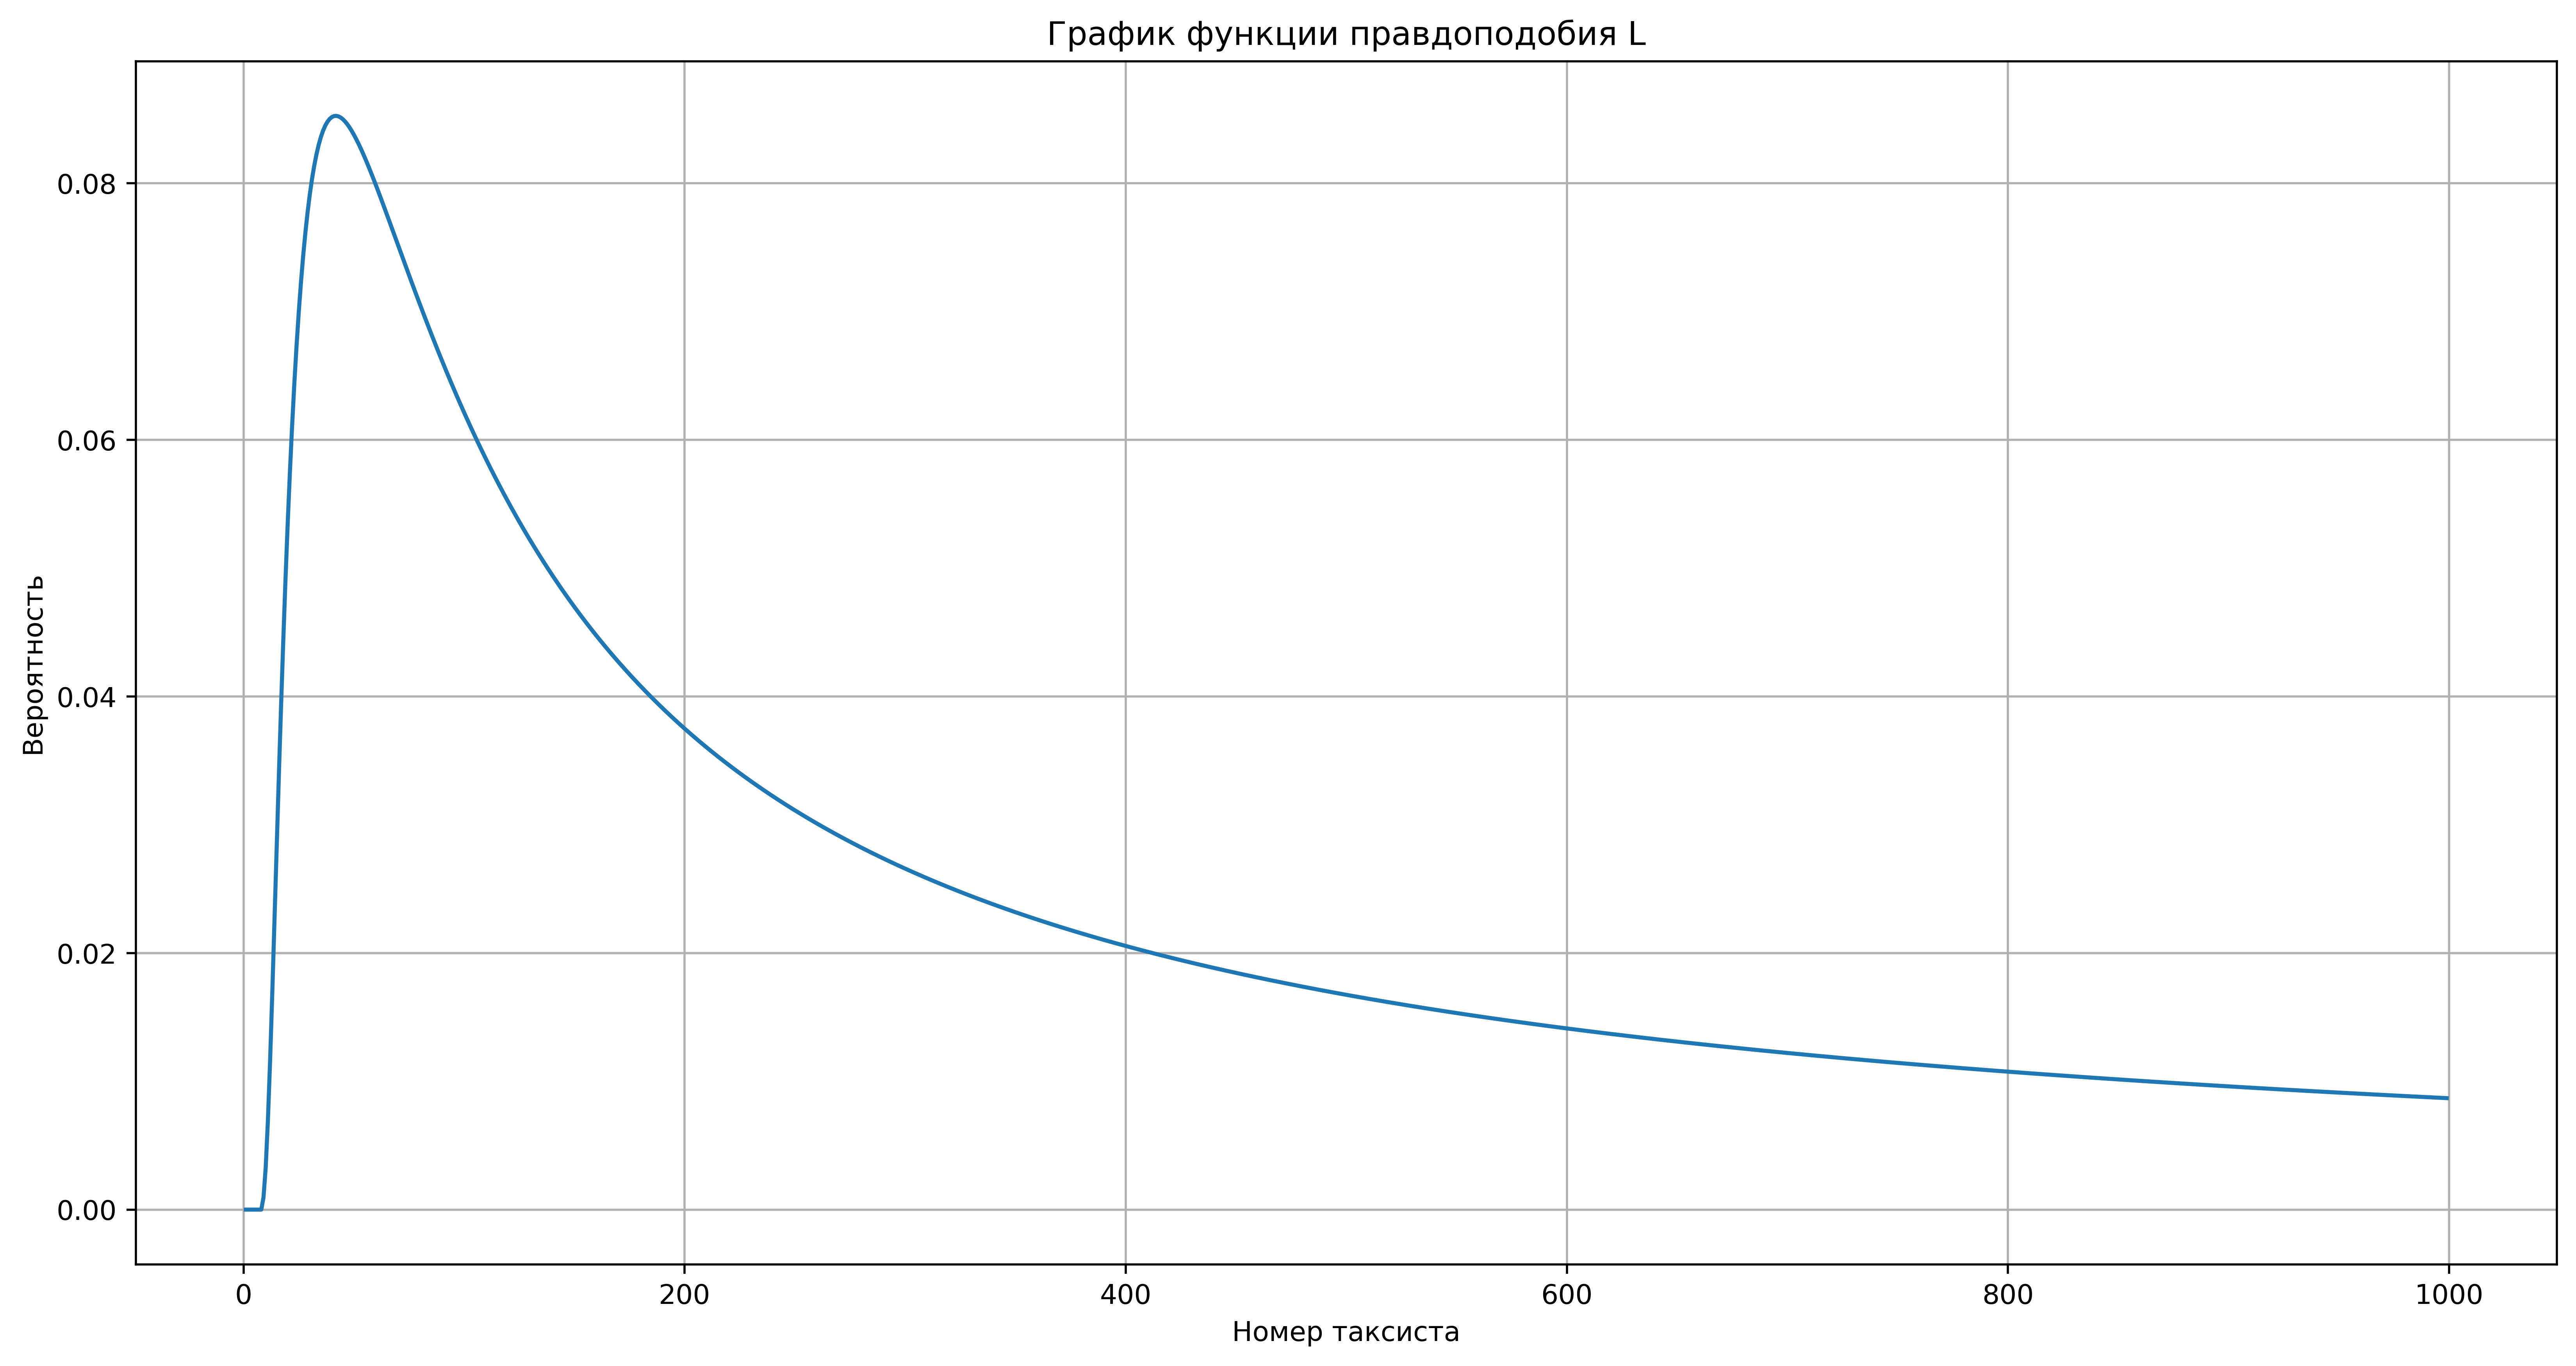

In [337]:
import math

def L(n):
    result = 9 / n
    for i in range(1, 9):
        result *= (n - i)/ n
    return result

c = np.arange(1, 1000)

plt.figure(figsize = (16, 8), dpi=500)
plt.plot(c, L(c))
plt.xlabel("Номер таксиста")
plt.ylabel("Вероятность")
plt.title("График функции правдоподобия L")
plt.grid();

Найдем оценку числа n методом максимального правдоподобия. Для того возьмем логарифм от L и максимизируем его:
$$
L = \frac{9\cdot (n-1) \cdot \ldots \cdot (n-8)}{n^9} \\
\ln L = \ln 9 + \ln(n-1) +\ldots +\ln(n-8) -9\ln n \longrightarrow\underset{n}\max\\
L'_n = \frac{1}{n_{ML} - 1}+\ldots+\frac{1}{n_{ML} - 8}-\frac{9}{n_{ML}}= 0\\
$$

Сделаем это в питоне с помощью функции максимизации argmax:

In [342]:
N_ML = np.argmax(L(c)) + 1

print(f'Оценка числа n методом максимального правдоподобия: {N_ML}')

Оценка числа n методом максимального правдоподобия: 42


Итого: $n_{ML} = 42$

б) [5] Постройте график математического ожидания номера заказа, на котором происходит первый повторный приезда, как функции от общего количества такси n. Найдите оценку числа n методом моментов.

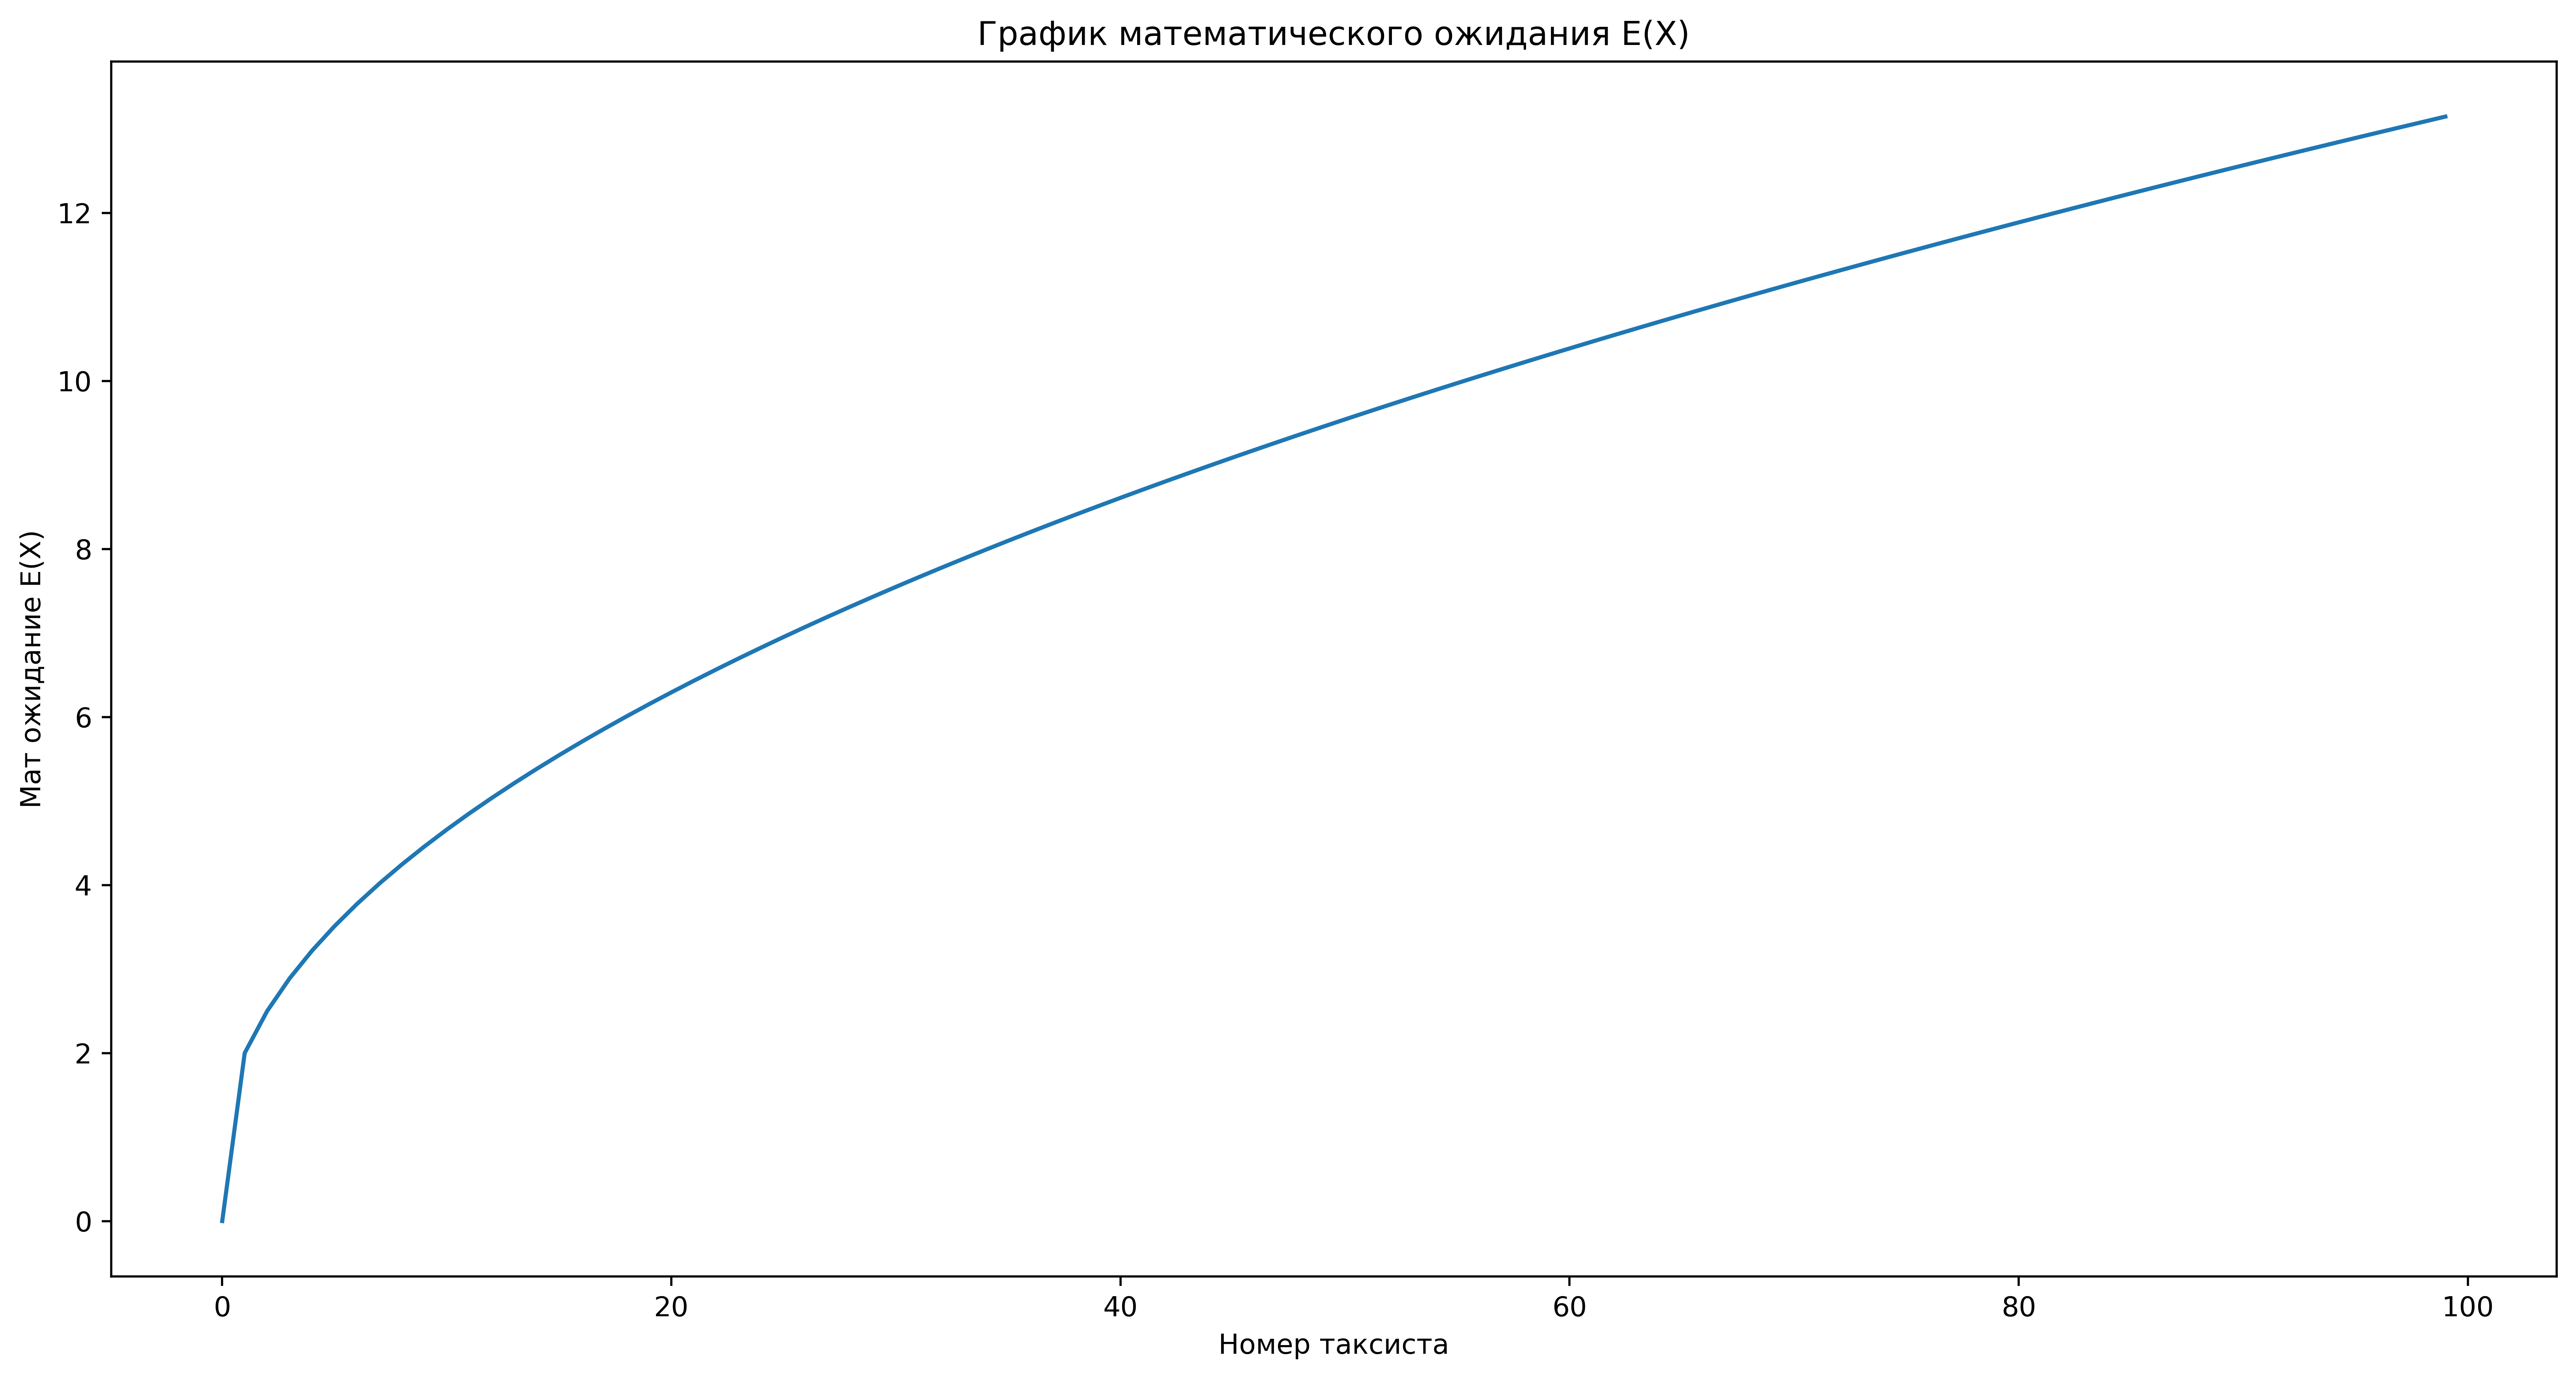

In [373]:
from math import prod

def expected_value(n):
    return sum(i * (i - 1) * prod((n - j) / n for j in range(i - 1)) / n for i in range(2, n + 2))

expected_values = np.array([])
n_values = np.arange(100)

for i in n_values:
    expected_values = np.append(expected_values, expected_value(i))

plt.figure(figsize = (16, 8), dpi=500)
plt.plot(n_values, expected_values)
plt.xlabel("Номер таксиста")
plt.ylabel("Мат ожидание E(X)")
plt.title("График математического ожидания E(X)")
plt.show()

Найдите оценку числа n методом моментов. Приравняем мат ожидание к выборочному первому моменту, равному среднему:

$$ E(X) = \overline{X} = X_1 = 10 $$

In [378]:
target_value = 10  # Значение теоритичсекого первого момента
closest_n = None  # Значение n
min_difference = float('inf')  # Минимальная разница

# Перебираем значения n от 1 до 100
for n in range(1, 100):
    result = expectation_taxi(n)
    difference = abs(target_value - result)

    if difference < min_difference:
        closest_n = n
        min_difference = difference

# Значение n, при котором разница минимальна
print("Значение n:", closest_n)
print("Разница:", min_difference)

Значение n: 55
Разница: 0.024951111485894018


Итого оценка числа n методом моментов: $n_{MM} = 55$

в) [15] Предположим, что настоящее n равно 100. Проведя 10000 симуляций вызовов такси до первого повторного, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов.
Оцените смещение, дисперсию и среднеквадратичную ошибку двух методов.

Проведем 10000 симуляций вызовов такси до первого повторного:

In [28]:
np.random.seed(42) 
n = 100
num_simulations = 10000 
days = []

for _ in range(num_simulations):
    drivers = []
    driver = np.random.randint(1, n+1)
    
    while driver not in drivers:
        drivers.append(driver)
        driver = np.random.randint(1, n+1)
    
    days.append(len(drivers) + 1)

Создадим функция для нахождение ML оценки:

In [27]:
import math

def L_new(k, n):
    result = (k-1) / n
    for i in range(1, k-1):
        result *= (n - i)/ n
    return result

## Задача №2

Однажды в Самарканде турист заказывал Яндекс-такси. На десятом заказе он обнаружил, что у таксистов было 6 разных имён. Для упрощения предположим, что все n имён среди таксистов
встречаются равновероятно и независимо от поездки к поездке.

а) [5] Постройте график функции правдоподобия как функции от общего количества имён n. Найдите оценку числа n методом максимального правдоподобия.

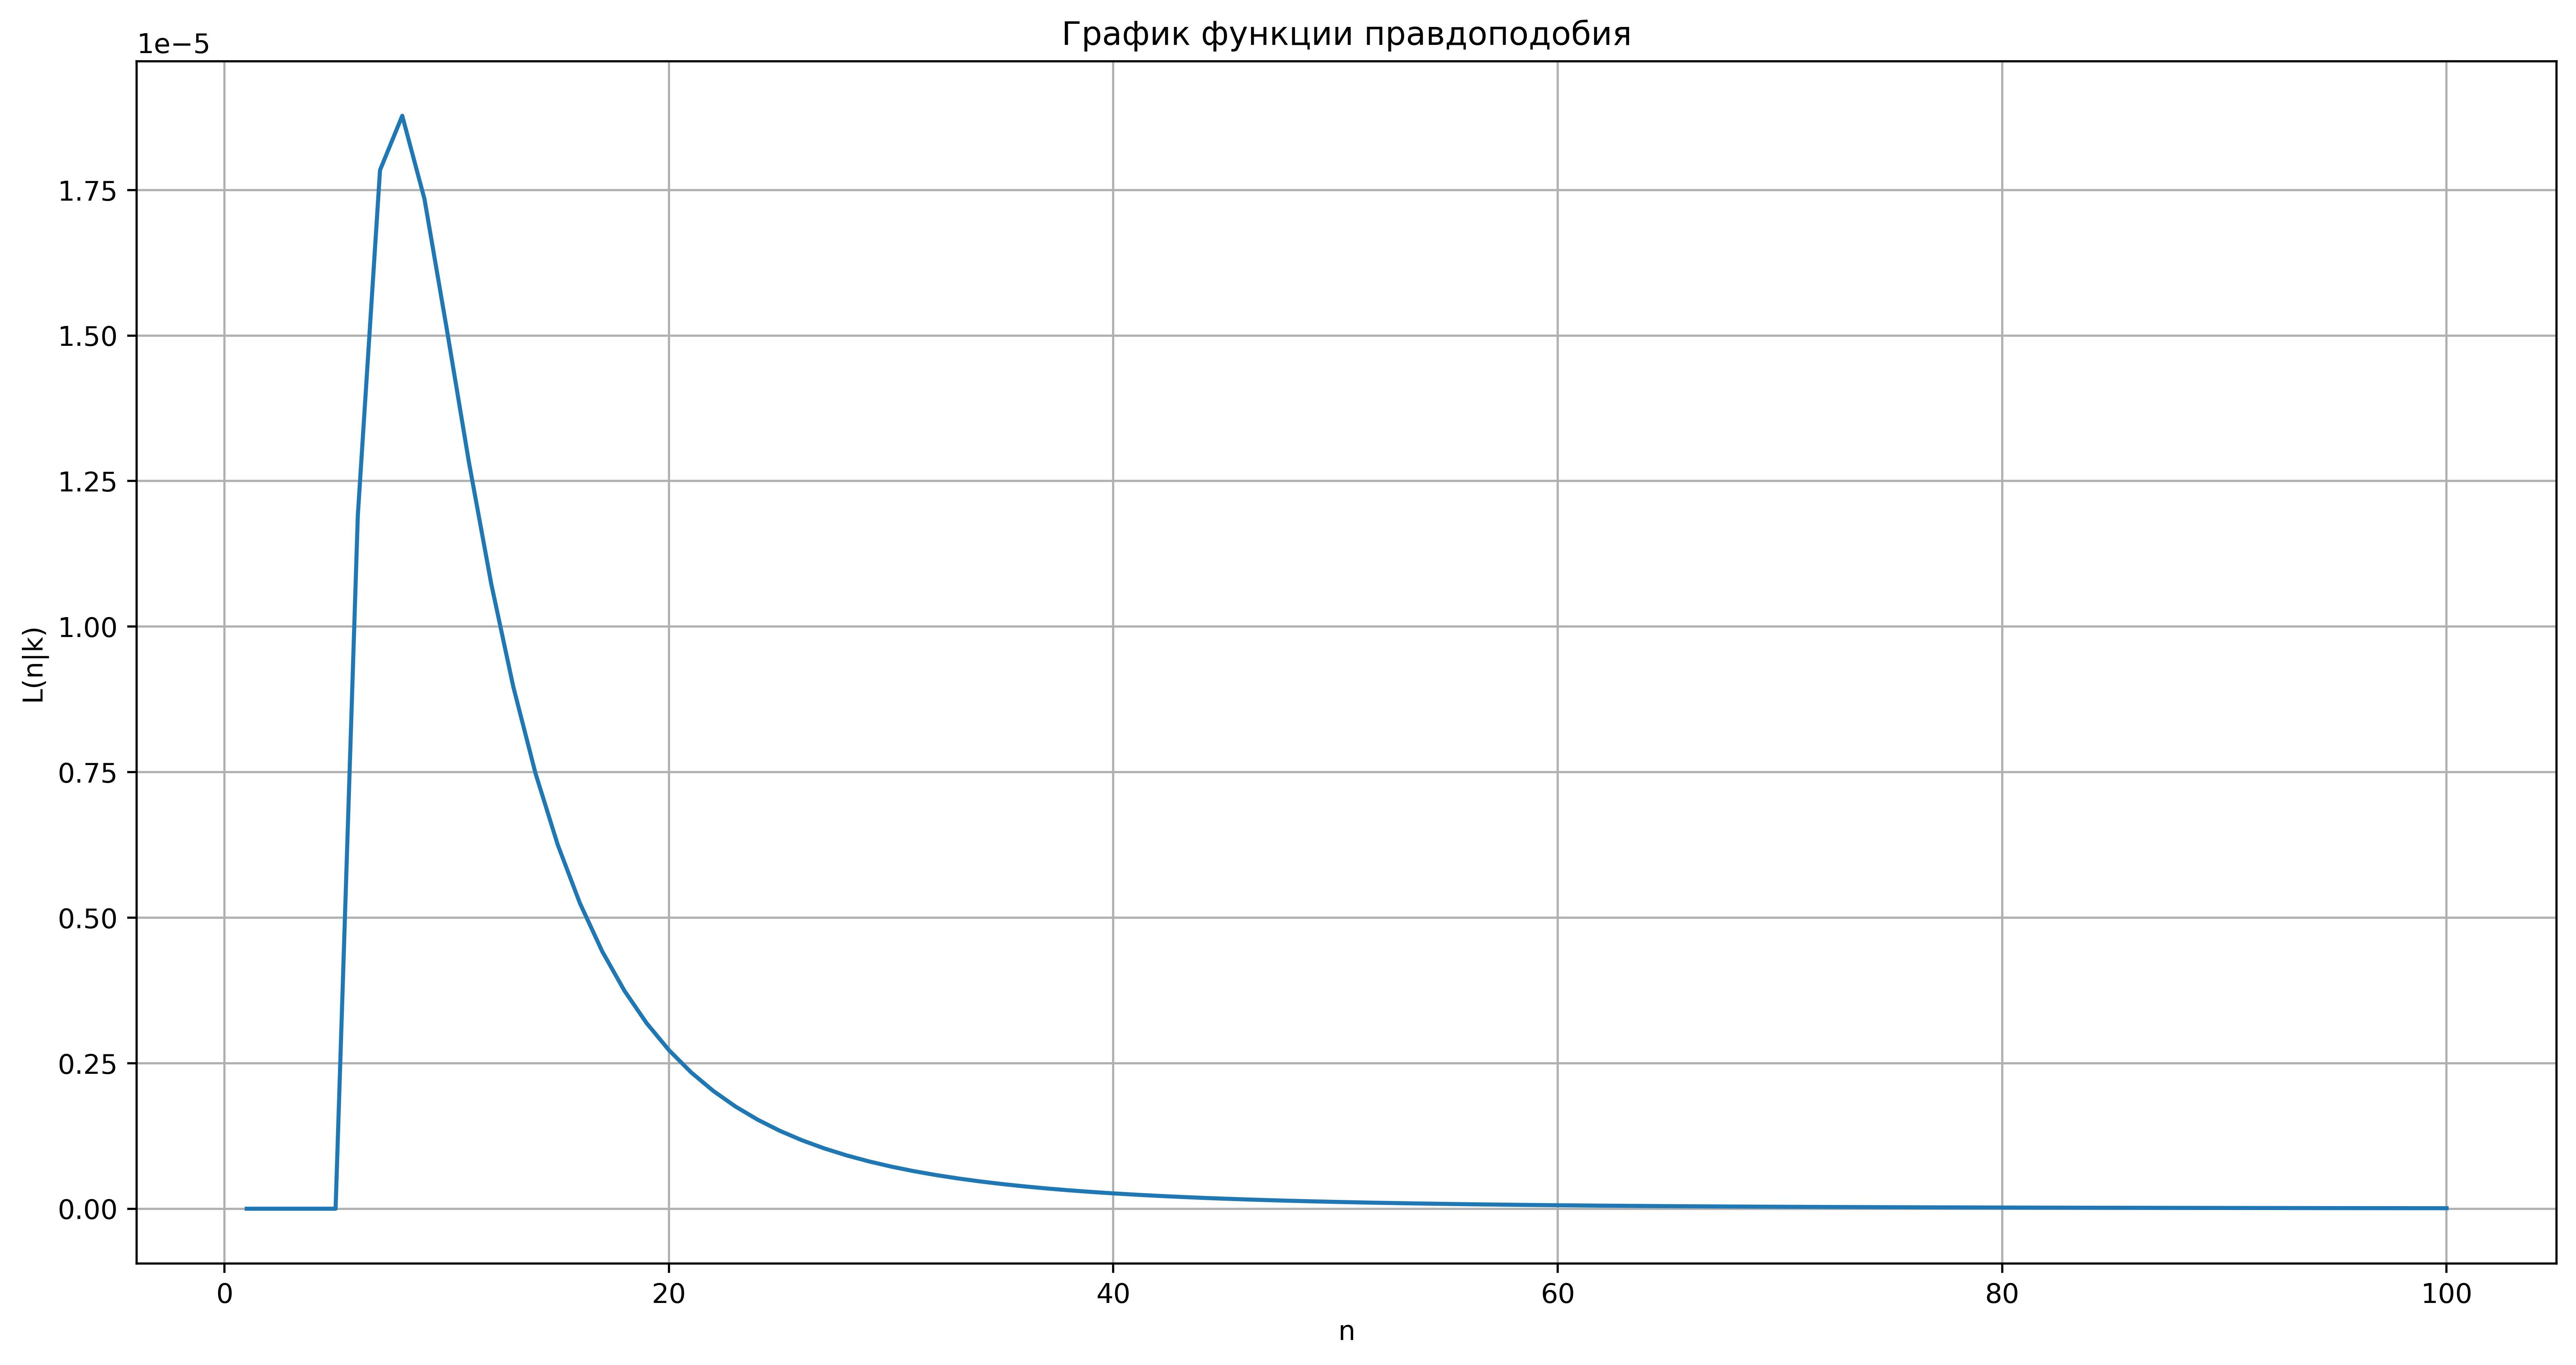

Оценка числа n методом максимального правдоподобия: 8


In [24]:
import numpy as np
import matplotlib.pyplot as plt

k = 6  # Количество различных имен на десятом заказе

def L(n):
    L = 1 / (n ** 4)
    for i in range(6):
        L *= (n-i) / n
    return L

# Построение графика функции правдоподобия
n_values = np.arange(1, 101)  # Рассмотрим значения n от 1 до 100
likelihood_values = L(n_values)
plt.figure(figsize = (16, 8), dpi=500)
plt.plot(n_values, likelihood_values)
plt.xlabel('n')
plt.ylabel('L(n|k)')
plt.title('График функции правдоподобия')
plt.grid(True)
plt.show()

# Оценка числа n методом максимального правдоподобия
estimated_n = np.argmax(likelihood_values) + 1
print("Оценка числа n методом максимального правдоподобия:", estimated_n)

Итого: Оценка числа n методом максимального правдоподобия 8

б) [5] Постройте график математического ожидания числа разных имён у 10 таксистов, как функции от общего количества имён n. Найдите оценку числа n методом моментов.

In [4]:
def count_unique_names(n):
    num_trips = 10
    num_unique_names = []
    for _ in range(num_trips):
        names = np.random.choice(range(1, n + 1), size=num_trips, replace=True)
        num_unique_names.append(len(set(names)))
    return num_unique_names

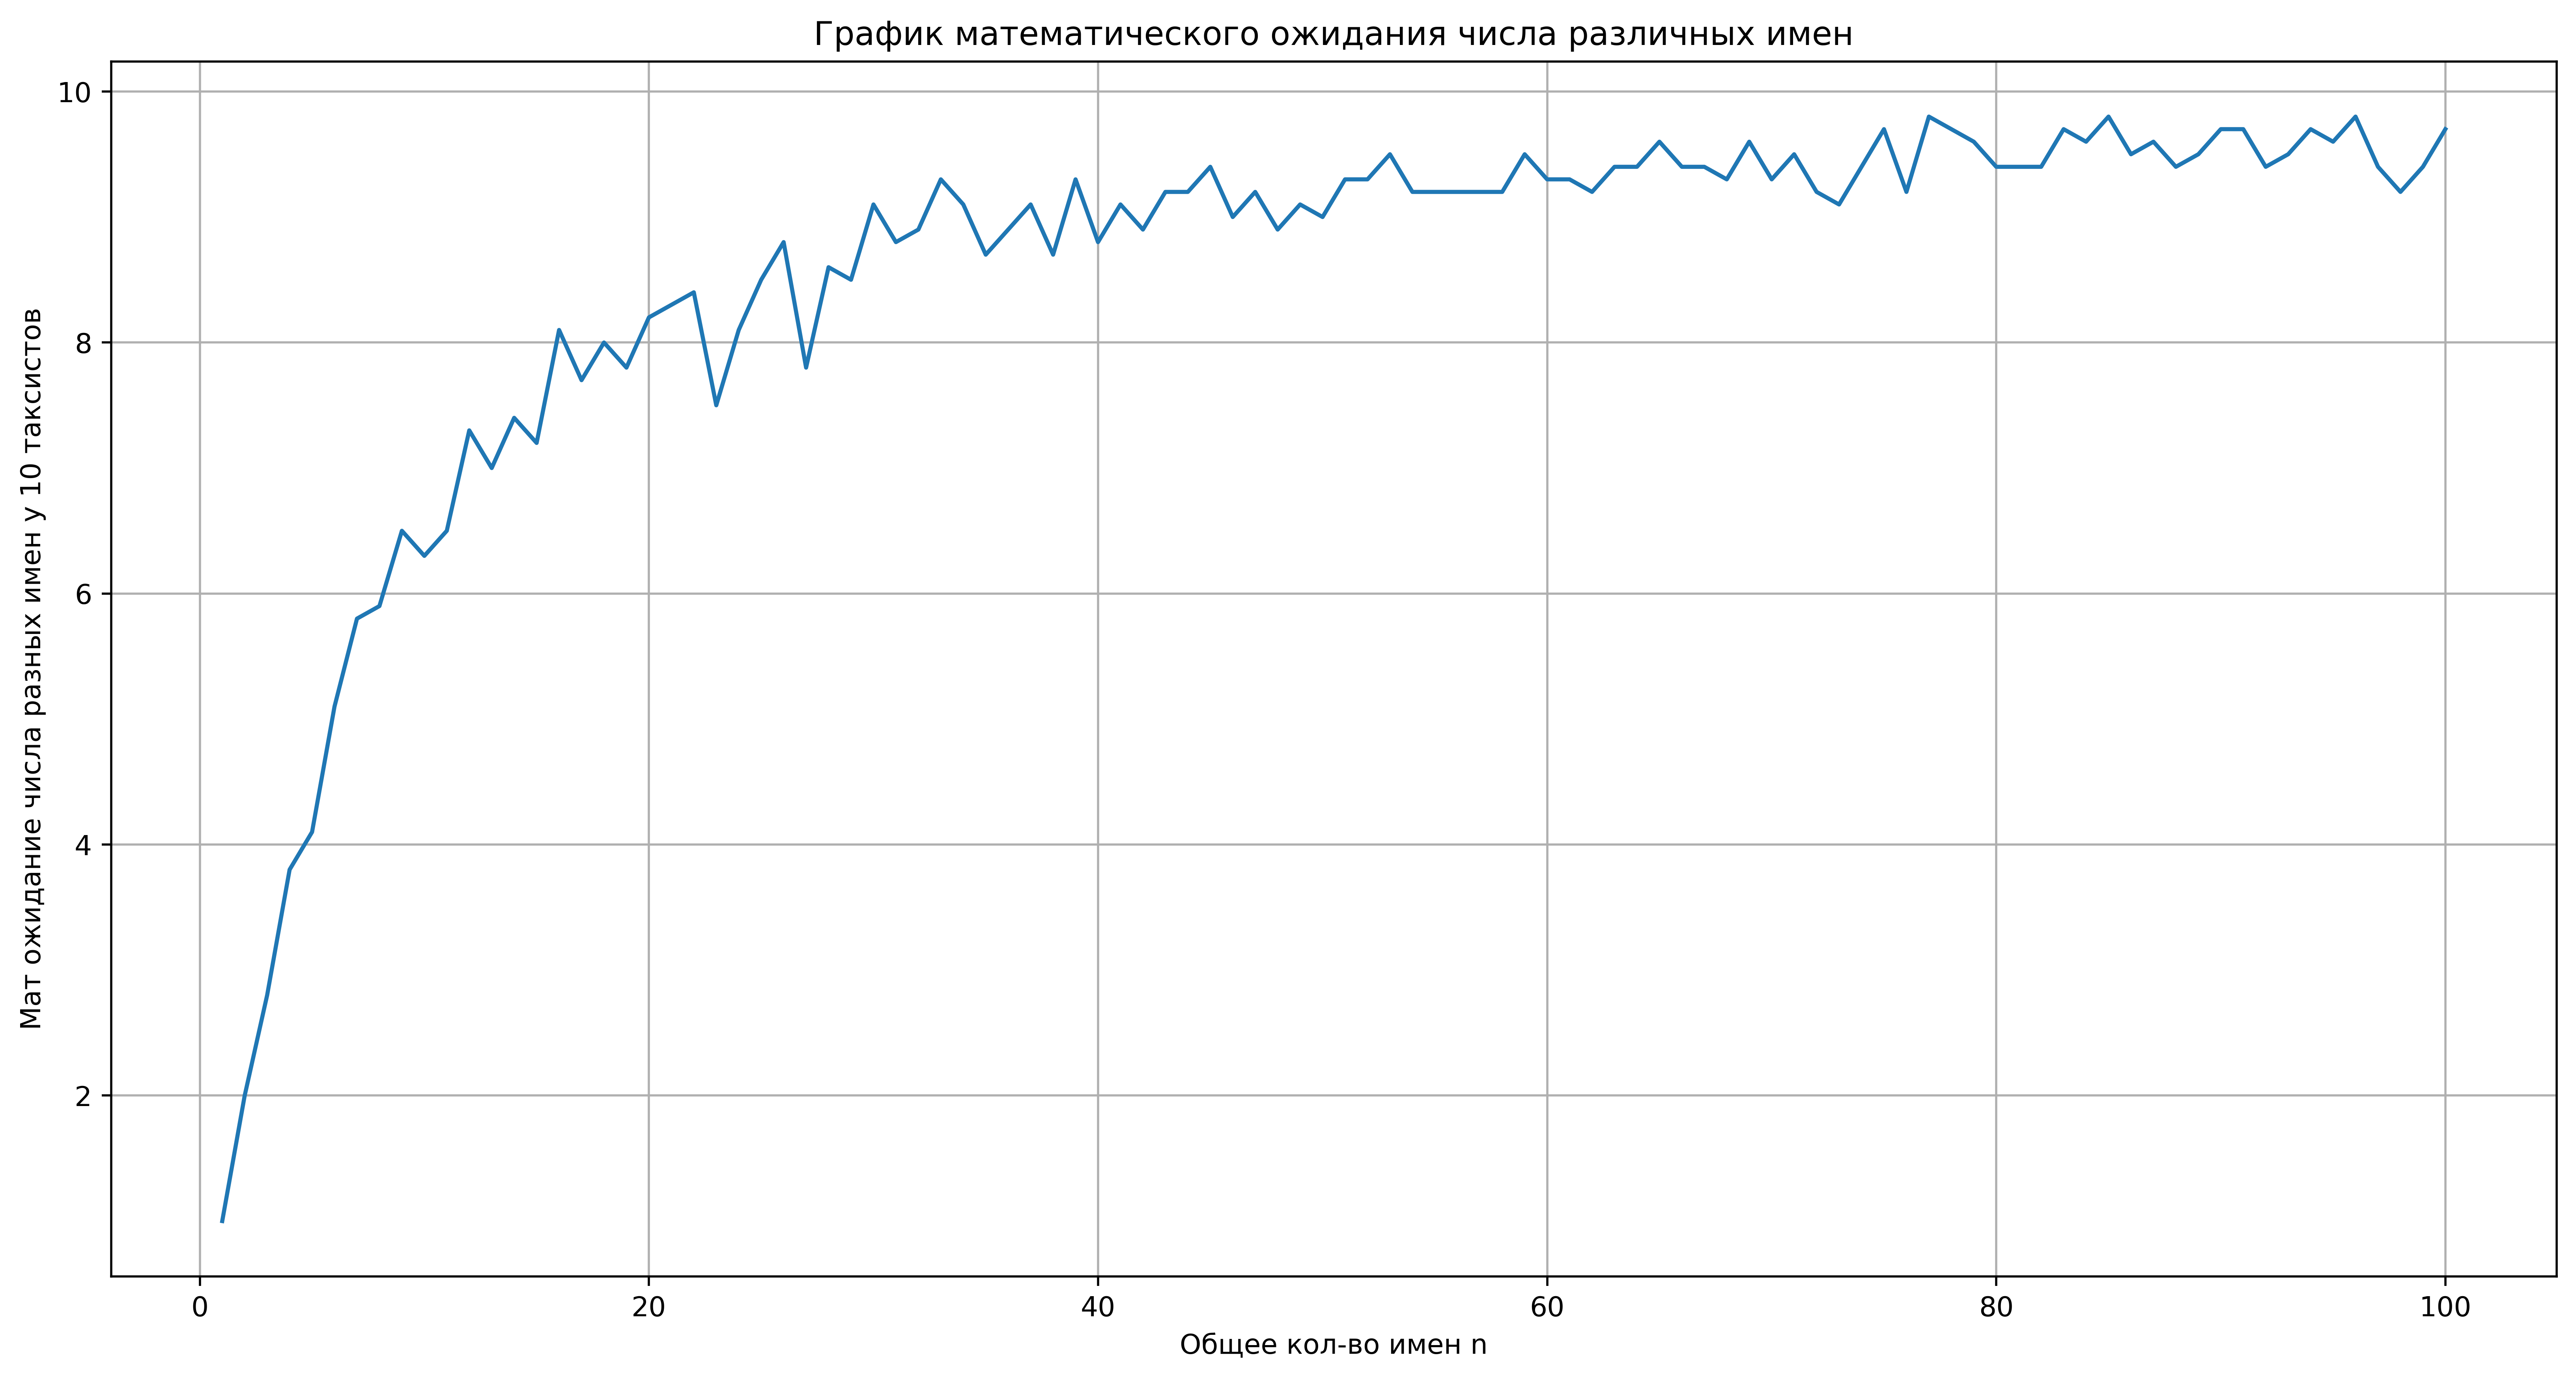

Оценка числа n методом моментов: 8


In [22]:
np.random.seed(42) 
n_values = np.arange(1, 101)  # Рассмотрим значения n от 1 до 100
expected_values = []

for n in n_values:
    unique_names = count_unique_names(n)
    expected_values.append(np.mean(unique_names))

plt.figure(figsize=(16, 8), dpi=500)
plt.plot(n_values, expected_values)
plt.xlabel('Общее кол-во имен n')
plt.ylabel('Мат ожидание числа разных имен у 10 таксистов')
plt.title('График математического ожидания числа различных имен')
plt.grid(True)
plt.show()

estimated_n = np.argmin(np.abs(np.array(expected_values) - 6)) + 1
print("Оценка числа n методом моментов:", estimated_n)

Итого оценка числа n методом моментов равна 8.

в) [15] Предположим, что настоящее n равно 20. Проведя 10000 симуляций десяти вызовов такси, рассчитайте 10000 оценок методом моментов и 10000 оценок методом максимального правдоподобия. Постройте гистограммы для оценок двух методов. Оцените смещение,
дисперсию и среднеквадратичную ошибку двух методов.
Update 2023-06-07: если по выборке в симуляциях оценка метода моментов или метода максимального правдоподобия стремится к бесконечности, то можно ограничить её сверху большим числом, например, 100.

In [36]:
import numpy as np

true_n = 20
num_simulations = 10000

# Оценки методом моментов
moment_estimates = []
for _ in range(num_simulations):
    unique_name_counts = count_unique_names(true_n)
    moment_estimate = np.argmin(np.abs(np.array(expected_values) - np.mean(unique_name_counts))) + 1
    moment_estimates.append(moment_estimate)

# Оценки методом максимального правдоподобия
likelihood_estimates = []
for _ in range(num_simulations):
    names = np.random.choice(range(1, true_n + 1), size=10, replace=True)
    unique_name_count = len(set(names))
    likelihood_estimate = np.argmax([L(n) for n in range(1, true_n+1)]) + 1
    likelihood_estimates.append(likelihood_estimate)

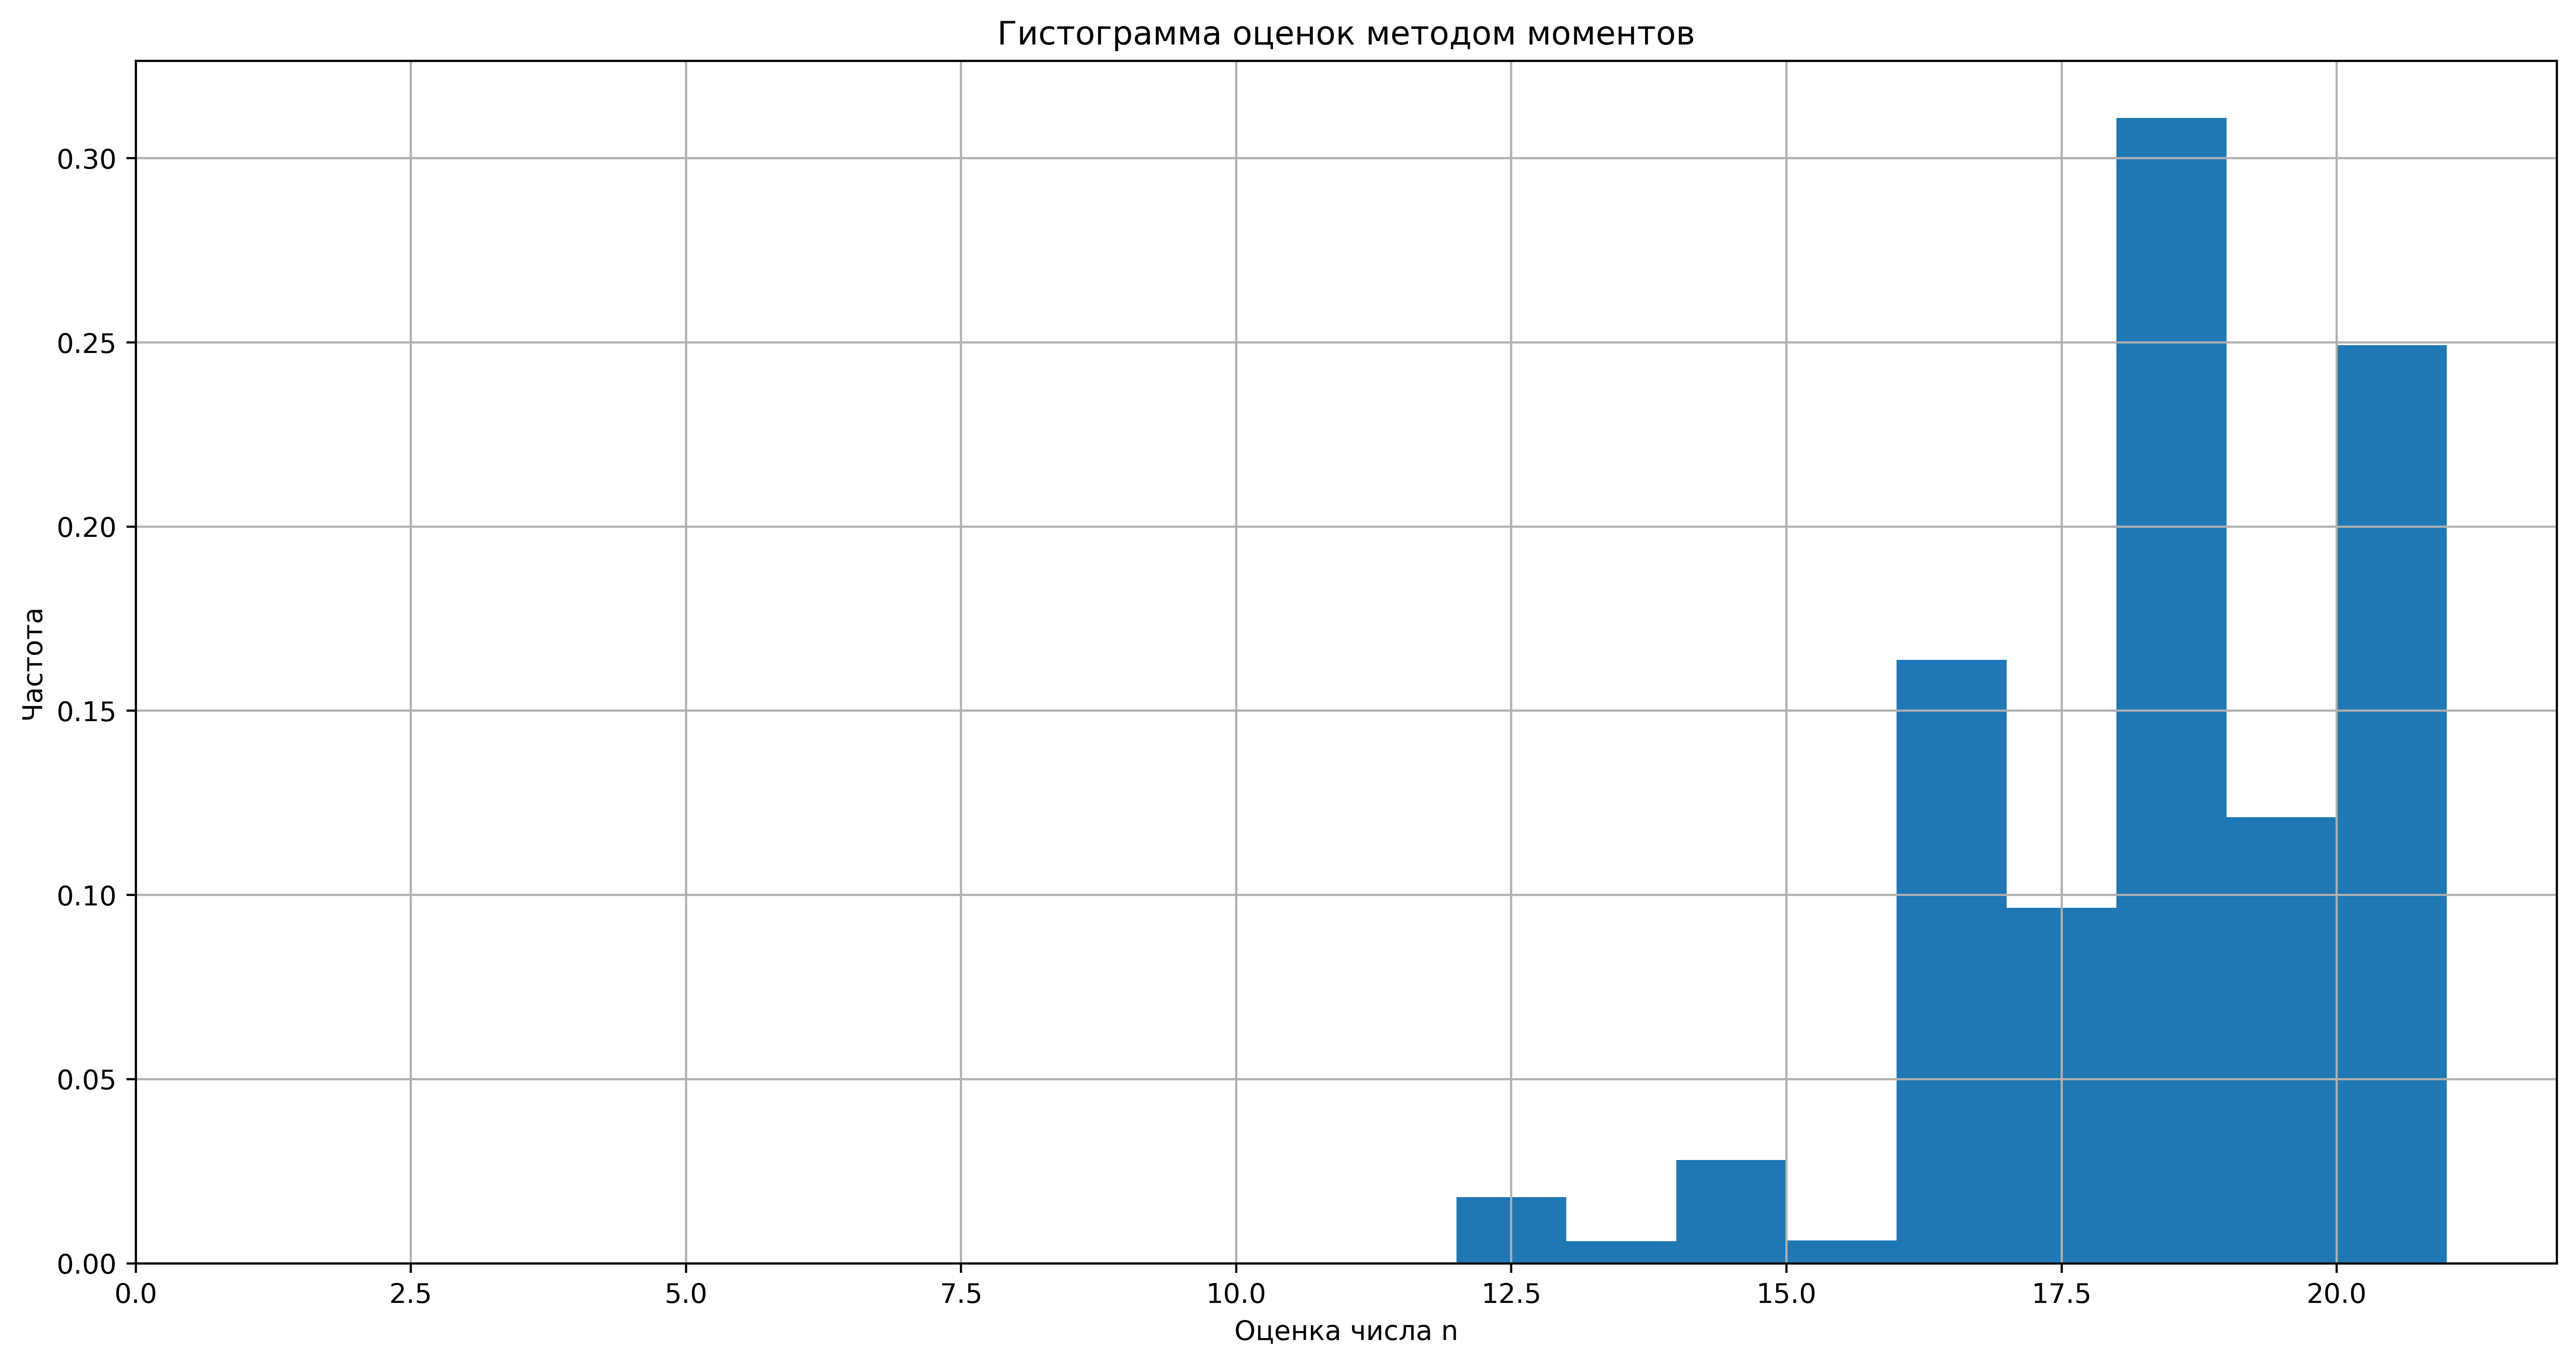

In [40]:
# Гистограмма оценок методом моментов
plt.figure(figsize = (16, 8), dpi=500)
plt.hist(moment_estimates, bins=range(1, true_n+2), density=True)
plt.xlabel('Оценка числа n')
plt.ylabel('Частота')
plt.title('Гистограмма оценок методом моментов')
plt.grid(True)
plt.show()

In [38]:
# Вычисление смещения, дисперсии и среднеквадратичной ошибки для метода моментов
moment_bias = np.mean(moment_estimates) - true_n
moment_variance = np.var(moment_estimates)
moment_mse = np.mean((np.array(moment_estimates) - true_n)**2)

# Вычисление смещения, дисперсии и среднеквадратичной ошибки для метода максимального правдоподобия
likelihood_bias = np.mean(likelihood_estimates) - true_n
likelihood_variance = np.var(likelihood_estimates)
likelihood_mse = np.mean((np.array(likelihood_estimates) - true_n)**2)

print("Смещение метода моментов:", moment_bias)
print("Дисперсия метода моментов:", moment_variance)
print("Среднеквадратичная ошибка метода моментов:", moment_mse)
print()
print("Смещение метода максимального правдоподобия:", likelihood_bias)
print("Дисперсия метода максимального правдоподобия:", likelihood_variance)
print("Среднеквадратичная ошибка метода максимального правдоподобия:", likelihood_mse)

Смещение метода моментов: -0.3993000000000002
Дисперсия метода моментов: 13.722059509999998
Среднеквадратичная ошибка метода моментов: 13.8815

Смещение метода максимального правдоподобия: -12.0
Дисперсия метода максимального правдоподобия: 0.0
Среднеквадратичная ошибка метода максимального правдоподобия: 144.0


## Задача №7

С помощью chatgpt решите любую задачу из нашего курса теории вероятностей и статистики. Можно брать задачи из прошлых контрольных, лекций, семинаров и даже этого домашнего задания. В качестве ответа приведите полный диалог с chatgpt.
Простой диалог в виде двух реплик условия и ответа chatgpt даёт 6 баллов. Сложный диалог с наводками, указанием chatgpt на ошибки и их исправлением — 10 баллов.

Решим задачу 6 из ДЗ

Ссылка на диалог: https://chat.openai.com/share/c3dda44b-5fb5-40f3-a683-ba1117a74c4a

Если не откроется, я скопировала в гугл док: https://docs.google.com/document/d/1YD-UK3Gt5g4FE3FU5o7ayv2Rdb1fJYIhUtwfwtNGdKA/edit

Итоговый код (работает!):

In [425]:
import numpy as np

# Вычисление наблюдаемой корреляции
observed_correlation = np.corrcoef(df['Last name'].str.len(), df['Score'])[0, 1]

# Проведение перестановочного теста
num_permutations = 10000  # Количество перестановок
permutation_correlations = []

for _ in range(num_permutations):
    # Перестановка значений длины фамилий
    permuted_length = np.random.permutation(df['Last name'].str.len())

    # Вычисление перестановочной корреляции
    permutation_correlation = np.corrcoef(permuted_length, df['Score'])[0, 1]
    permutation_correlations.append(permutation_correlation)

# Вычисление P-значения
pvalue = 2 * min(np.mean(np.array(permutation_correlations) <= observed_correlation),
                  np.mean(np.array(permutation_correlations) >= observed_correlation))

print("P-значение:", pvalue)

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Корреляция не равна нулю.")
else:
    print("Не отвергаем нулевую гипотезу. Нет достаточных доказательств против того, что корреляция равна нулю.")

P-значение: 0.6434
Не отвергаем нулевую гипотезу. Нет достаточных доказательств против того, что корреляция равна нулю.


## Задача №8

Укажите любой источник по теории вероятностей или статистике, который вам оказался полезен в течение года. Это может быть статья, видео, задача, всё что угодно. Объясните, с чем конкретно этот источник помог разобраться. Лучше привести в пример внешний источник, не упомянутый на вики курса, но можно и внутренний.

Из последнего разобраться в ДИ, статистиках, проверках гипотез и бутстрэпе очень помог англоязычный канал про статистику простыми словами: https://www.youtube.com/@statquest.
Чтобы разобраться в том, как работает бутстрэп, я смотрела видео https://youtu.be/Xz0x-8-cgaQ и https://youtu.be/N4ZQQqyIf6k. Это помогло решить задачи в этой домашней работе, а также в целом понять, что происходит и как вообще применять бутстрэп. 

Также в течение всего курса было полезно обращаться к сайту http://mathprofi.ru/, там были материалы на многие темы и можно было подтянуть слабые моменты. Не помню, с какими именно темами он мне помог, но обращалась я к нему ни раз.

Ну и записи семинаров Пильника (для базы) и Демешева (для интересных задачек) тоже помогали очень.